# GRADIENT BOOST MACHINE LEARNING MODEL.

Gradient boost algorithm is a type of ensemble algorithm that gradually learns from waeker learners i.e. decision tree and subsequently rectifies to improve prediction. In each training step, a learner is strengthed by minimising the loss function (MSE or class entropy) in each succeeding step in a process refered to as gradient descent. A loss function calculates the differene between actual values and predicted values, internally the model uses this value to guide output of the next model such that error is mininised as much as possible. At each iteration, the model computes the gradient of loss function for the current ensemble algorithm with respect to the previous one, learns and  trains a new weaker model to reduce gradient. This process is repeated many times, sometimes upto 1000, till a stoping criterion is met. All  weaker learners are combined to form a stronger model with potentially higher performance.  

This machine learning model is commonly due to the following reasons : 

* Higher accuracy as compared to other supervised modelling models.
* Wide ranging application, it can be used in classification and regression tasks.
* Easy to understand due to its simplicity. 

### Algorithm Process. 

Given a dataset with x and y features, lets predict voter turnout for the year 2020 given predictor variablea voter turn out in 2016 and median age of voters. 

<center><img src="../images/GradBost1.png" width=600px height=300px /></center>

* **Step 1. Make initial Prediction.**

The first prediction is the average value of target variable , (0.63 + 0.56 + 0.8 + 0.51) / 4 = 0.625. The mean ensure the gradient of loss functions is te smallest, inthis case its 0.  

* **Step 2. Calculate residuals.** The difference between observed values and predicted values are called pseudo residuals. Lets place these values in a new column called R_1. 

<center><img src="../images/Gradbost2.png" width=700px height=300px /></center>

* **Step 3. Build a weaker learner.** 

We then build a decision tree that predicts the residials above using two features, age and 2016 voter turn out. The tree will have only 4 leave nodes. 

<center><img src="../images/GradBost3.png" width=700px height=400px /></center>

Now the data has been fitted to the output and has learnt and gained knowledge. We predict voter turnout by observing the features, when observing attributes of the first row the model, it falls on the leaf node with 0.005. 

Path followed by row 1;  

<center><img src="../images/GradBost6.png" width=700px height=300px /></center>

Thus predicted value will be, Pred_1 = 0.625(initial predicted) + (0.005) = 0.63. Consequently all values predicted will be 100% accurate when compared to actual values, Voter_turnout2020.  

<center><img src="../images/GradBost4.png" width=700px height=300px /></center>

Our model perfectly predicted voter turnout for the year 2020, but lets not be fooled, this model is overfiting and when exposed to unknown values it may cause an error. We only need it to generalise the data, this is achieved by introducing a gradient boosting parameter, the learning rate. This scaling factor multiplies the predicted values by a value between 0 and 1, when we choose 0.1, our initial value will be Pred_2 = 0.625(initial predicted)  + (0.005) * 0.1 = 0.6255.

<center><img src="../images/GradBoost5.png" width=700px height=300px /></center>

* **Step 5. Build a second pseudo-residual, R_2.** 

A second group of residuals are calculated by subtracting new predictions from original 2020 voter turnout predictions. Row 1 ,R_2 : 0.63 - 0.6255 = 0.0045 ,filled table below. 

<center><img src="../images/GradBost7.png" width=900px height=300px /></center>

* **Step 6. Iteration.** 

Take note of the gradual reduction in loss as more tree residuals are added. This step is repeated tens or even hundreds of times depending on user need. Each iteration is referred to as a boosting round, a weaker learner is strengthened. Gradient loss can be monitored to assess the nature of loss, if there no imrovement in loss the algorithm is terminated using early stop. Each tree predicts a label and the final prediction is given by the formula,

y(pred) = y1 + (res *  r1) + (res * r2) + ....... + (res * rN)

* **Step 7. Hyperparameters.**

Hyperparameters are settings that modify the behaviour of an algorithm, they include number of trees, learning rate , maximum depth and many more.Most of the are provided in default mode but depending on the nature of tasks a user can change them. The learning rate defines the shrinkage factor of a weak learner, a lower value close to 0 means that the model will contribute minimally in the ensemble and can result to many number of trees increasing computation resources need but improved performance.   

Letrs implement this algorithm with a larger dataset that contains more features and observations as compared to our sample dataset from above. 








In [30]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preprocessing. 

In [2]:
# Load data 
path = 'F:/Programs/Secrets of ML/Data/US_Elections.gpkg'

# Read data containing county polygons. 
data = gpd.read_file(path, layer='US_CountyElections_clean')

data.columns

Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry'],
      dtype='object')

Columns : Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry'],
      dtype='object')


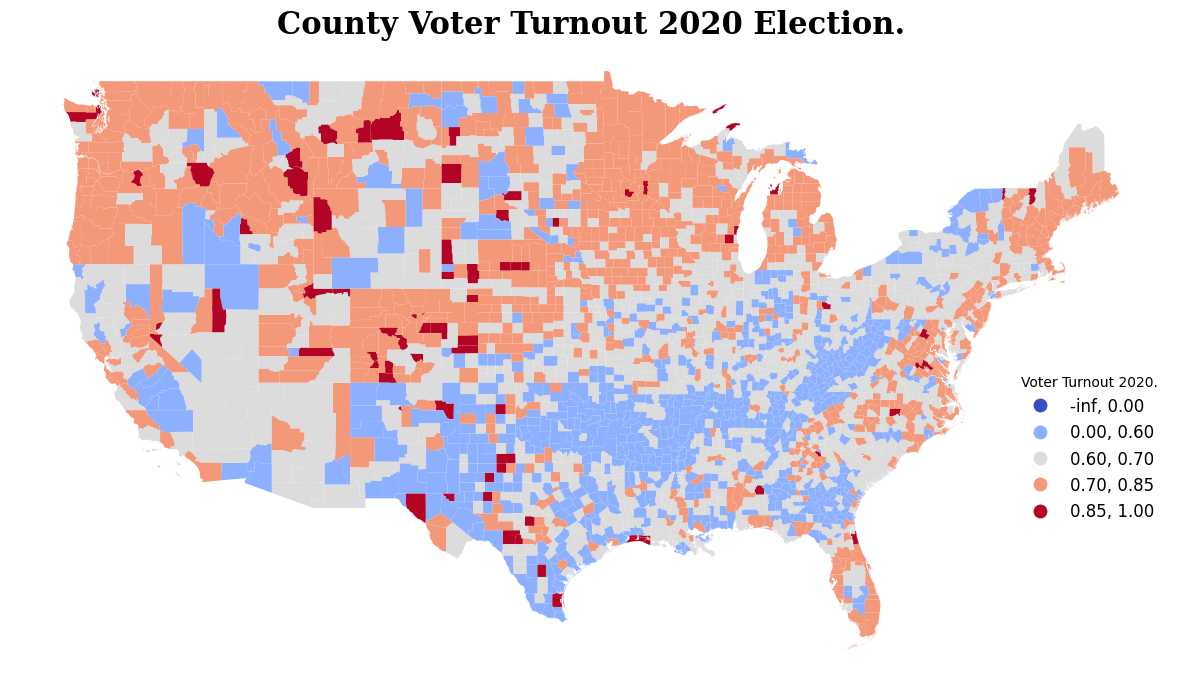

In [3]:
# Legend Parameters 
legend_kwds= {
  'loc': 'best',
  'bbox_to_anchor': (0.5, 0., 0.5, 0.5),
  #'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 12,
  'title': 'Voter Turnout 2020.'
}

# Legend bins 
classification_kwds={
  'bins':[0, 0.6, 0.7, 0.85, 1]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,15)
data.plot(ax=ax, column='voter_turnout_2020', cmap='coolwarm', scheme='User_Defined',
         classification_kwds=classification_kwds, legend=True, legend_kwds=legend_kwds)

# Remove axis 
ax.set_axis_off()

# Add a title
ax.set_title('County Voter Turnout 2020 Election.', fontsize=22, fontweight='bold', 
          fontfamily='serif', color='black')

plt.show()

In [4]:
# Data properties 

# Check missing and null values in the dataframe . data type objects,  
print(f'Columns features :\n  {data.info()} \n\n ----------------------------\n')

# Distribution on numerical data 
print(f'Numerical variables distributions : \n {data.describe()} \n\n ----------------------------\n')

# Data sample 
print(f'Data head :\n {data.head(2)}')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   county_FIPS                              3108 non-null   object  
 1   name                                     3108 non-null   object  
 2   population                               3108 non-null   int64   
 3   state_abbr                               3108 non-null   object  
 4   state_fips                               3108 non-null   object  
 5   state_name                               3108 non-null   object  
 6   voter_turnout_2008                       3108 non-null   float64 
 7   voter_turnout_2012                       3108 non-null   float64 
 8   voter_turnout_2016                       3108 non-null   float64 
 9   voter_turnout_2020                       3108 non-null   float64 
 10  2022_median_age             

# 2. Feature Scalling. 

Our predictor attributes have varied distribution that may impact negatively on the model. This may increase model inaccuracies resulting to a faulty prediction. Data needs to be normalised so that they can have an equally distributed effect on the model. 

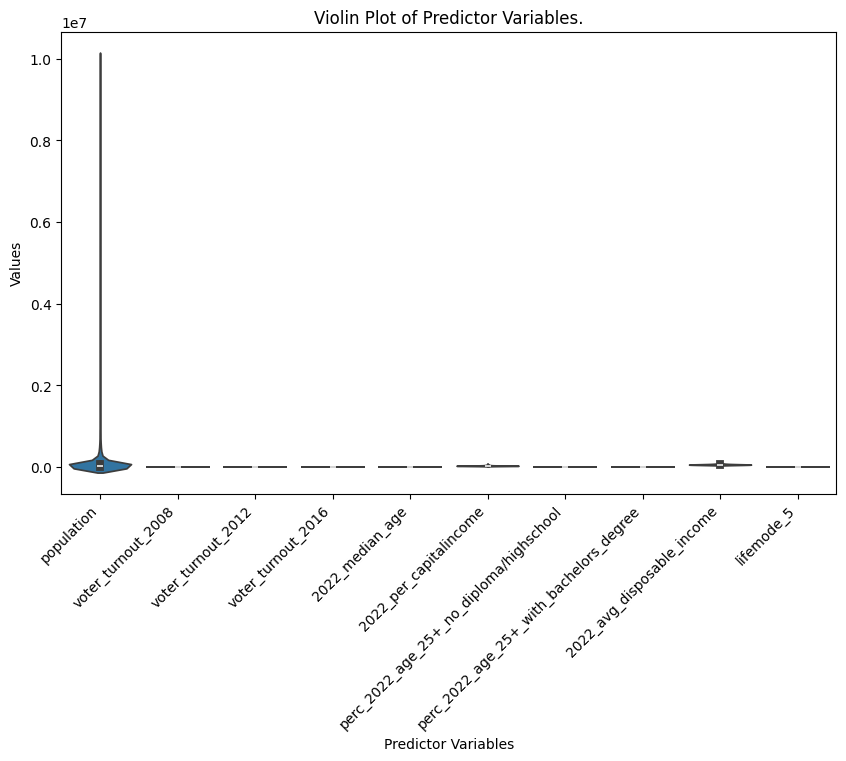

In [3]:
# Step 2: Use Matplotlib and Seaborn to create the violin plot

# Predictor variables 
# Select numeric values that will be used as predictors 
X = data.select_dtypes(include=['int64', 'float']).drop('voter_turnout_2020', axis=1)

plt.figure(figsize=(10, 6))
sns.violinplot(data=X)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Violin Plot of Predictor Variables.')
plt.xlabel('Predictor Variables')
plt.ylabel('Values')
plt.show()


Scaled data features  : 
        population  voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
count   3108.0000           3108.0000           3108.0000           3108.0000   
mean       0.0106              0.5103              0.4900              0.5085   
std        0.0337              0.1136              0.1160              0.1101   
min        0.0000              0.0000              0.0000              0.0000   
25%        0.0011              0.4334              0.4095              0.4344   
50%        0.0026              0.5144              0.4889              0.5103   
75%        0.0068              0.5865              0.5685              0.5818   
max        1.0000              1.0000              1.0000              1.0000   

       2022_median_age  2022_per_capitalincome  \
count        3108.0000               3108.0000   
mean            0.4800                  0.2767   
std             0.1267                  0.1096   
min             0.0000                  0.00

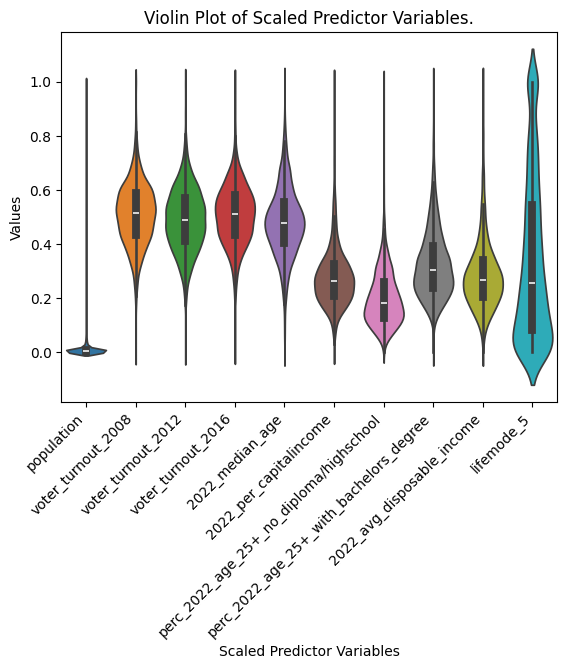

In [4]:
# Scaler ALL numeric data through normalisation 

scaleMinMax = MinMaxScaler(feature_range=(0, 1))  # Scaler ensures values should range between 0 and 1 

X = scaleMinMax.fit_transform(X)

# Create a dataframe of scaled data 
X = pd.DataFrame(X, columns=['population', 'voter_turnout_2008', 'voter_turnout_2012','voter_turnout_2016', 
                             '2022_median_age', '2022_per_capitalincome','perc_2022_age_25+_no_diploma/highschool',
                            'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income', 'lifemode_5'])

# View Scaled data 
print(f'Scaled data features  : \n {X.describe().round(4)}')

# Plot scaled data 
sns.violinplot(data=X)
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Violin Plot of Scaled Predictor Variables.')
plt.xlabel('Scaled Predictor Variables')
plt.ylabel('Values')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\3070888787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


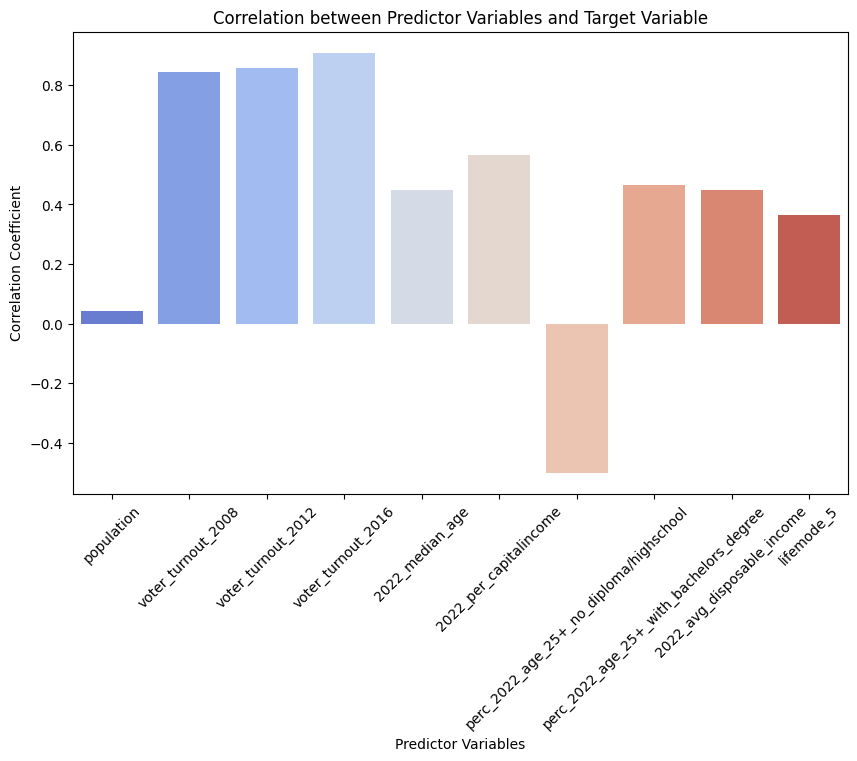

In [12]:
# Plot a correlation matrix between predictor variables and target
data2 = data.select_dtypes(include=['int64', 'float'])
correlations = data2.corr()['voter_turnout_2020'].drop('voter_turnout_2020')

# Use Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

# Title and labels
plt.title('Correlation between Predictor Variables and Target Variable')
plt.xlabel('Predictor Variables')
plt.ylabel('Correlation Coefficient')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [7]:
data.columns

Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry'],
      dtype='object')

# 3. Predict Voter Turnout for the year 2020.

In this model, we will split the data into the training set and the test set then predict 2020 voter turnout. The model will be trained with the values of the training set and the predictions tested on the test/validation set. Out of 3108 rows, 70%(2176 rows) are used for training and the model is tested on the remaining 932 rows representing 30% of the observation as given by the condition, test_size=0.3. 



In [26]:
# Target/dependent variable.
y = data[['voter_turnout_2020']]

# Independent variables were already defined in scaling step previously

# Split the data into training(70%) and testing data(30%) ,pick random rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

# Train a Gradient Boosting Regressor model
gbr1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr1.fit(X_train, y_train)


# Making predictions on the same data or new data
y_pred_train = gbr1.predict(X_train)
y_pred_test = gbr1.predict(X_test)

# Evaluating the model
# Mean squared error 
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print(f'Mean Squared Error in train dataset : {mse_train}')
print(f'Mean Squared Error in test dataset : {mse_test}')
print(f'R^2 Score in train dataset : {r2_train}')
print(f'R^2 Score in test dataset : {r2_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Squared Error in train dataset : 0.000856027330177048
Mean Squared Error in test dataset : 0.0014154609970943005
R^2 Score in train dataset : 0.9106746510549852
R^2 Score in test dataset : 0.8428487622945425


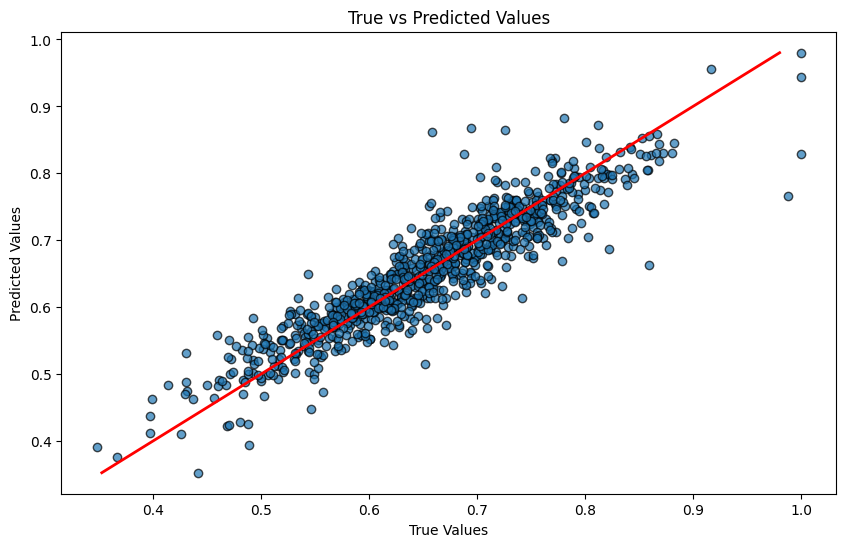

In [21]:
# Visualise results using scatter plot and a gradient line 

# Initiate plot 
plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(y_test, y_pred_test, edgecolor='k', alpha=0.7)
# Gradient line
plt.plot([min(y_pred_test), max(y_pred_test)], [min(y_pred_test), max(y_pred_test)], color='r', lw=2)

# Labels
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2640495130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


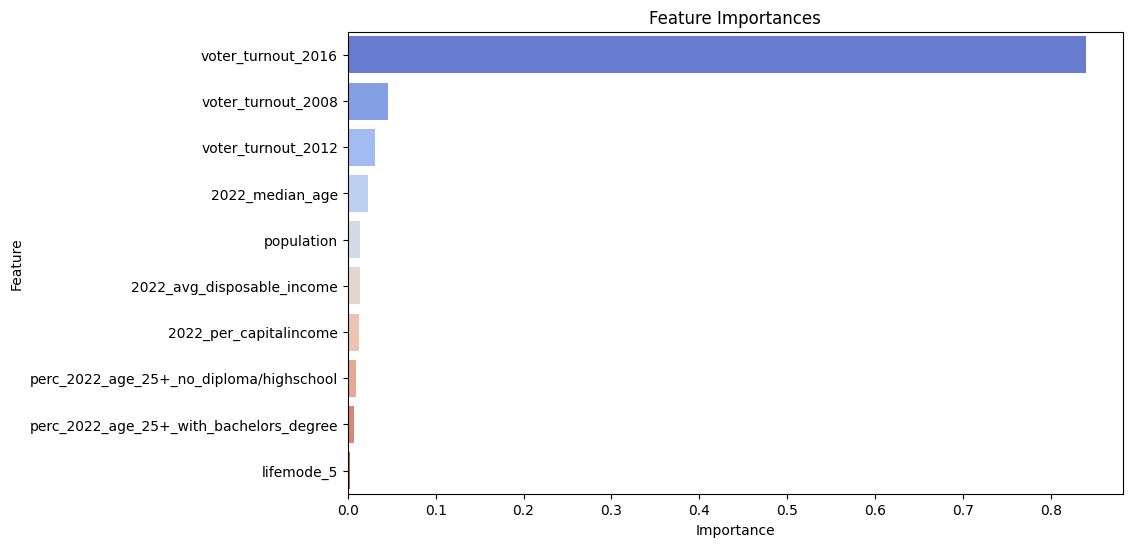

In [23]:
# Plot variable importance
feature_importances = gbr1.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 4. Parameter Tunning. 

Tuning the parameters of a Gradient Boosting model is essential to improve its performance. This can be achieved using  Grid Search. 

In [37]:
# Remove columns (from standardised data) with little impact on the model based on feature importance graph
X2 = X.drop(['2022_per_capitalincome','perc_2022_age_25+_no_diploma/highschool',
            'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income', 'lifemode_5'], axis=1)

# Target/dependent variable.
y = data[['voter_turnout_2020']]

# Split the data into training(70%) and testing data(30%) ,pick random rows
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state=25)

#  Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 3],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'subsample': [0.5 ,0.8]
}

# Perform Grid Search with Cross-Validation
gbr2 = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr2, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Train the best model
best_gbr = grid_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Evaluate the model on test data 
y_pred_test2 = best_gbr.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred_test2)
r2_2 = r2_score(y_test, y_pred_test2)

print(f'Best Parameters in grid search : {grid_search.best_params_}')
print(f'Mean Squared Error after tunning : {mse2}')
print(f'R^2 Score after tunning : {r2_2}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters in grid search : {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.5}
Mean Squared Error after tunning : 0.0015843892405964534
R^2 Score after tunning : 0.8240935421900895


The model had a slight decrease in its performance accuracy, this shows that sometimes its not neccesarily guaranteed to have an improved accuracy when models are user defined, default parameters can as well be fine. 

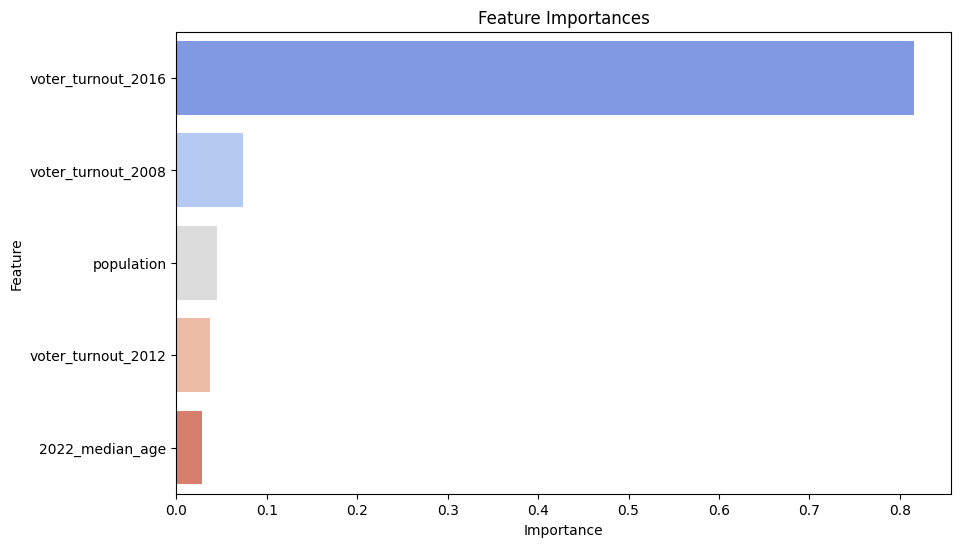

In [40]:
# Plot variable importance
feature_importances = best_gbr.feature_importances_
features = X2.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()